Task-1

Understanding of Recurrent Neural Network (RNN). Play with the provided codes and
construct LSTM and GRU model. Try to produce the initial weights and hidden states (after
several iteration) of both LSTM and GRU models. Why does the loss fluctuate greatly during
RNN training? How does LSTM solve the problem of gradients vanishing in RNN?

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

# from the given codes Construct LSTM model
lstm_model = nn.LSTM(input_size=100, hidden_size=200)

# from the given code Construct GRU model
gru_model = nn.GRU(input_size=100, hidden_size=200)

# produce the initial weights for LSTM and GRU
print("Initial weights for LSTM:")
print(lstm_model.weight_ih_l0)
print(lstm_model.weight_hh_l0)
print("\nInitial weights for GRU:")
print(gru_model.weight_ih_l0)
print(gru_model.weight_hh_l0)

# Construct a sequence randomly
x = Variable(torch.randn(6, 5, 100))  # seq x batch x features

# Define initial hidden states for LSTM and GRU
# num_layers * num_directions, batch_size, hidden_size
h0_lstm = Variable(torch.zeros(1, 5, 200))
c0_lstm = Variable(torch.zeros(1, 5, 200))
h0_gru = Variable(torch.zeros(1, 5, 200))

# Feed into LSTM
out_lstm, (hn_lstm, cn_lstm) = lstm_model(x, (h0_lstm, c0_lstm))

# Feed into GRU
out_gru, hn_gru = gru_model(x, h0_gru)

# Print hidden states after several iterations for LSTM and GRU
print("\nHidden states after several iterations for LSTM:")
print(hn_lstm)
print("\nHidden states after several iterations for GRU:")
print(hn_gru)


Initial weights for LSTM:
Parameter containing:
tensor([[ 0.0334, -0.0258, -0.0530,  ...,  0.0660, -0.0686,  0.0041],
        [-0.0040,  0.0247, -0.0651,  ...,  0.0259,  0.0600, -0.0263],
        [-0.0671, -0.0555, -0.0106,  ...,  0.0130,  0.0571, -0.0286],
        ...,
        [-0.0435, -0.0462,  0.0466,  ..., -0.0227, -0.0091, -0.0691],
        [-0.0102,  0.0087,  0.0264,  ..., -0.0372,  0.0420,  0.0349],
        [ 0.0004, -0.0347, -0.0469,  ..., -0.0150,  0.0506, -0.0558]],
       requires_grad=True)
Parameter containing:
tensor([[ 2.5625e-05,  2.1915e-02, -2.6438e-03,  ...,  3.8120e-02,
          2.8320e-02, -7.3104e-03],
        [-5.5306e-02, -1.7614e-02, -9.7268e-03,  ..., -1.5838e-02,
          2.7111e-02,  1.4336e-02],
        [ 1.4717e-02, -2.9015e-02, -2.4956e-02,  ...,  6.8567e-02,
          5.1605e-02, -2.8957e-02],
        ...,
        [-3.5744e-02, -3.5400e-02, -5.7613e-02,  ..., -6.2119e-02,
         -4.1155e-02, -4.6698e-02],
        [-4.5173e-02,  1.1382e-02,  4.1331e-

Loss Fluctuation fluctuates greatly during RNN Training:

Loss fluctuation during RNN training is fluctuated  caused by several factors:
Exploding gradients: Large gradients make the training unstable and which may cause the loss to change randomly which may result in fluctuation.
Vanishing gradients: Small gradients can result in low convergence and may lead to fluctuations.
Nonlinearities: Nonlinearities in data may result in non convex loss landscape which can lead to fluctuations greatly.

Gradient clipping, normalization techniques and scheduling learning rate can solve the problem

How LSTM Solves the Problem of Gradients Vanishing in RNN:

LSTM (Long Short-Term Memory) introduces a memory cell and gatting mechanism which solves the problem of Gradients vanishing in RNN.
The forget gate in LTSM helps the model to retain or discard the information of the earlier state, which is useful to solve the problem of Gradient vanishing in RNN.
The input and output gates regulate the information flow in RNN. Thus LTSM solve the Gradient issue
By maintaining a constant error flow through the memory cell and gating mechanisms, it can solve the long term dependencies.



Task 2

Recurrent Neural Network for time series data prediction. Suppose we have data of monthly
aircraft traffic in 10 years as shown in Fig. 1. Predicting the traffic of the current month based
on the traffic of the first two months, we can use the traffic of the first two months as input
and the traffic of the current month as output. Can you get the similar or better result as
shown in Fig. 2?

In [ ]:
from google.colab import files

# Upload data file
uploaded = files.upload()

Saving task2_data.csv to task2_data (8).csv


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

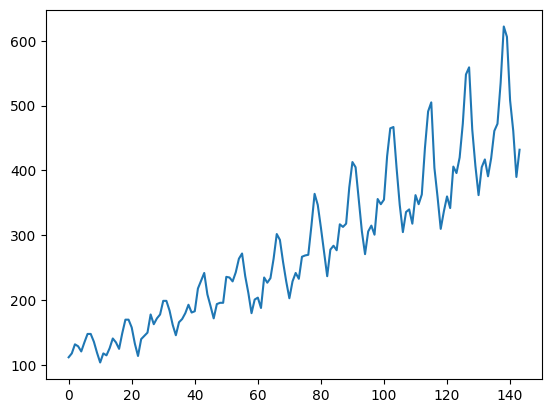

In [ ]:
# Load the data
data_csv = pd.read_csv('task2_data.csv', usecols=[1])
plt.plot(data_csv)

# Data preprocessing
data_csv = data_csv.dropna()
dataset = data_csv.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [ ]:
# Define a function to create dataset
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Create the dataset with a look back of 2 months
look_back = 2
X, y = create_dataset(dataset, look_back)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Generate predictions for training and testing sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


Epoch 1/100
4/4 [==============================] - 4s 14ms/step - loss: 0.1823
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1537
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1403
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1276
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1155
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1034
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0927
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0826
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0647
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0567
Epoch 13/100
4/4 [==============================] - 0s 5ms/s

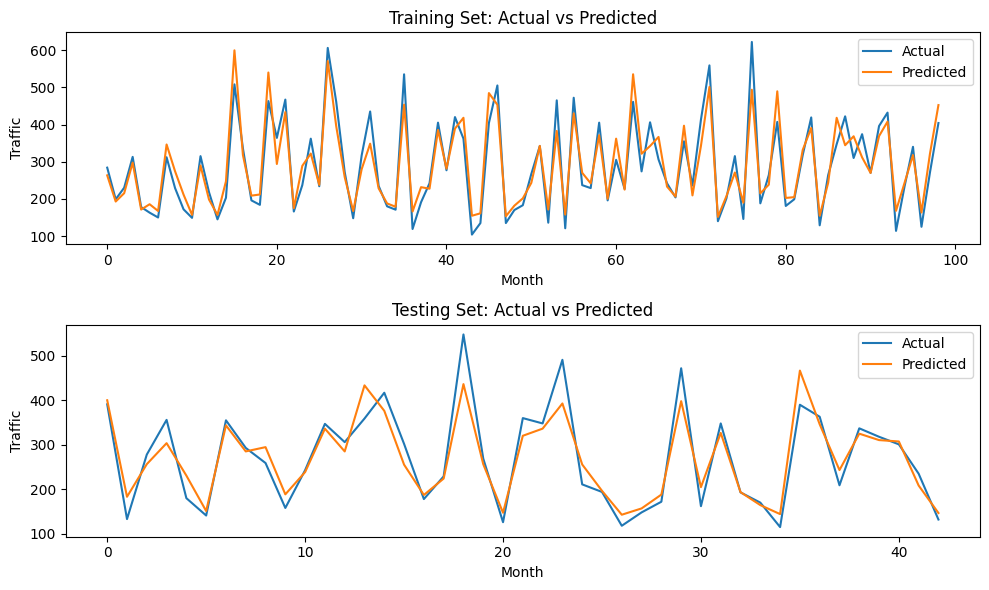

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.subplot(2, 1, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(train_predict.flatten(), label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.legend()

# Plot testing data
plt.subplot(2, 1, 2)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(test_predict.flatten(), label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.legend()

plt.tight_layout()
plt.show()

In the training and testing set we can observe better results compared to the figure given in the task
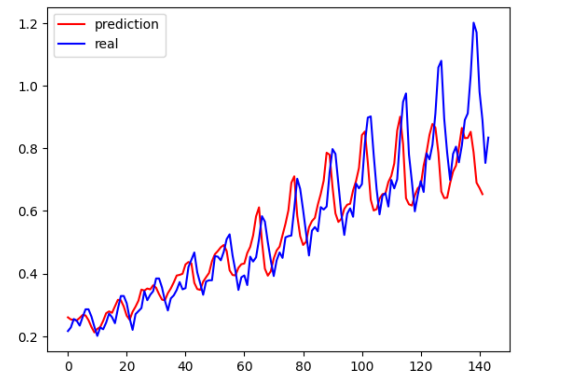

Task 3

RNN is particularly suitable for sequence type data, can RNN be used for image
classification like CNN? For a picture of handwritten as shown in Fig. 3, its size is 28 * 28,
we can regard it as a sequence of length 28, and the features of each sequence are 28. Try to
use RNN for image classification in MINST dataset.

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm import tqdm

In [ ]:
from tqdm import tqdm
from PIL import Image
import io
from google.colab import files

In [ ]:
# Load MNIST dataset
train_set = MNIST('./data', train=True, transform=ToTensor(), download=True)
test_set = MNIST('./data', train=False, transform=ToTensor(), download=True)

In [ ]:
# Define RNN model
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=28, hidden_size=128, num_layers=1, batch_first=True)
        self.fc = nn.Linear(128, 10)  # Output size is 10 for 10 classes

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out


In [ ]:
# Initialize model, loss function, and optimizer
model = RNN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)


In [ ]:
# Upload image
uploaded = files.upload()


Saving dhp1.jpeg to dhp1.jpeg


In [ ]:
# Access the uploaded image
image_bytes = uploaded[next(iter(uploaded))]


In [ ]:
# Open the image using PIL
image = Image.open(io.BytesIO(image_bytes))

In [ ]:
from torch.optim import Adam
from torchvision.transforms import ToTensor, Compose, Resize, Grayscale

In [ ]:
# Preprocess the image
preprocess = Compose([Grayscale(), Resize((28, 28)), ToTensor()])
image = preprocess(image)

# Reshape and normalize the image
image = image.view(1, 28, 28)  # Reshape to (1, 28, 28) to match RNN input shape
image = (image - 0.5) / 0.5  # Normalize image

In [ ]:
# Classify the image using the RNN model
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)
    predicted_class = predicted.item()

print('Predicted class:', predicted_class)

Predicted class: 1


I have used the same hand written digits I used in the CNN task. But unfortunately the RNN particularly doesn't seem suitable for image classification. Trying out with several images it does not seem suitable for image classification. While RNNs are indeed well-suited for sequential data such as text, time series, and speech, they are not typically suitable for image classification tasks like CNNs.